<a href="https://colab.research.google.com/github/haspdecrypted/E-commerce-Sales-Data-/blob/main/Ecommerce_sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download Java


In [7]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

##Download and Unzip hadoop

In [8]:
!wget -q https://downloads.apache.org/spark/spark-3.2.4/spark-3.2.4-bin-hadoop2.7.tgz
!tar xf spark-3.2.4-bin-hadoop2.7.tgz

##Adding env path
This is required to access the libraries locally

In [12]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.4-bin-hadoop2.7"

##Install findspark
This is required to locate spark locally

In [13]:
!pip install -q findspark
import findspark
findspark.init()

##Setting up Spark session and port

In [14]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

##Accessing file

In [18]:
!wget --continue https://raw.githubusercontent.com/haspdecrypted/E-commerce-Sales-Data-/main/data%20file/E_comm.json -O /tmp/E_comm.json

--2023-09-10 18:57:10--  https://raw.githubusercontent.com/haspdecrypted/E-commerce-Sales-Data-/main/data%20file/E_comm.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 356169 (348K) [text/plain]
Saving to: ‘/tmp/E_comm.json’

/tmp/E_comm.json    100%[===================>] 347.82K  --.-KB/s    in 0.01s   

2023-09-10 18:57:10 (27.1 MB/s) - ‘/tmp/E_comm.json’ saved [356169/356169]



##Reading Multiline Json File

In [23]:

# Read multiline json file
multiline_df = spark.read.option("multiline","true") \
      .json("/tmp/E_comm.json")
multiline_df.show()


+------------+--------------+-------+---+--------------------+----+----------------+-----------+-----+--------+----------+----------+----------+
|amount_spent|       country|cust_id|day|         description|hour|    invoice_date|invoice_num|month|quantity|stock_code|unit_price|year_month|
+------------+--------------+-------+---+--------------------+----+----------------+-----------+-----+--------+----------+----------+----------+
|        15.3|United Kingdom|  17850|  3|white hanging hea...|   8|01-12-2010 08:26|     536365|   12|       6|    85123A|      2.55|    201012|
|       20.34|United Kingdom|  17850|  3| white metal lantern|   8|01-12-2010 08:26|     536365|   12|       6|     71053|      3.39|    201012|
|        22.0|United Kingdom|  17850|  3|cream cupid heart...|   8|01-12-2010 08:26|     536365|   12|       8|    84406B|      2.75|    201012|
|       20.34|United Kingdom|  17850|  3|knitted union fla...|   8|01-12-2010 08:26|     536365|   12|       6|    84029G|      3.

# Exploratory Data Analysis Using Pyspark
##Print schema

In [24]:
multiline_df.printSchema()

root
 |-- amount_spent: double (nullable = true)
 |-- country: string (nullable = true)
 |-- cust_id: long (nullable = true)
 |-- day: long (nullable = true)
 |-- description: string (nullable = true)
 |-- hour: long (nullable = true)
 |-- invoice_date: string (nullable = true)
 |-- invoice_num: long (nullable = true)
 |-- month: long (nullable = true)
 |-- quantity: long (nullable = true)
 |-- stock_code: string (nullable = true)
 |-- unit_price: double (nullable = true)
 |-- year_month: long (nullable = true)



##Display records

In [29]:
multiline_df.show(4,False)

+------------+--------------+-------+---+-----------------------------------+----+----------------+-----------+-----+--------+----------+----------+----------+
|amount_spent|country       |cust_id|day|description                        |hour|invoice_date    |invoice_num|month|quantity|stock_code|unit_price|year_month|
+------------+--------------+-------+---+-----------------------------------+----+----------------+-----------+-----+--------+----------+----------+----------+
|15.3        |United Kingdom|17850  |3  |white hanging heart t-light holder |8   |01-12-2010 08:26|536365     |12   |6       |85123A    |2.55      |201012    |
|20.34       |United Kingdom|17850  |3  |white metal lantern                |8   |01-12-2010 08:26|536365     |12   |6       |71053     |3.39      |201012    |
|22.0        |United Kingdom|17850  |3  |cream cupid hearts coat hanger     |8   |01-12-2010 08:26|536365     |12   |8       |84406B    |2.75      |201012    |
|20.34       |United Kingdom|17850  |3  

##Count of records

In [31]:
multiline_df.count()

1027

##Selecting columns to display

In [35]:
multiline_df.select("amount_spent", "country", "cust_id").show(5)

+------------+--------------+-------+
|amount_spent|       country|cust_id|
+------------+--------------+-------+
|        15.3|United Kingdom|  17850|
|       20.34|United Kingdom|  17850|
|        22.0|United Kingdom|  17850|
|       20.34|United Kingdom|  17850|
|       20.34|United Kingdom|  17850|
+------------+--------------+-------+
only showing top 5 rows



##Applying filter on data
In this we are filtering the data where  

*   quant > 8
*   amount spent > 20.34
*   cust id is not null



In [36]:
df_filtered = multiline_df.filter("quantity > 8 AND amount_spent > 20.34 AND cust_id IS NOT NULL")
df_filtered.select("cust_id", "amount_spent", "cust_id").show(30, False)

+--------+------------+-------+
|quantity|amount_spent|cust_id|
+--------+------------+-------+
|32      |54.08       |13047  |
|24      |90.0        |12583  |
|24      |90.0        |12583  |
|12      |45.0        |12583  |
|48      |40.8        |12583  |
|24      |30.0        |12583  |
|18      |53.1        |12583  |
|24      |70.8        |12583  |
|24      |46.8        |12583  |
|24      |46.8        |12583  |
|24      |46.8        |12583  |
|24      |39.6        |12583  |
|24      |70.8        |12583  |
|12      |45.0        |12583  |
|36      |23.4        |12583  |
|80      |204.0       |13748  |
|32      |350.4       |15100  |
|48      |165.6       |15291  |
|64      |163.2       |15291  |
|10      |29.5        |14688  |
|12      |45.0        |14688  |
|120     |50.4        |14688  |
|48      |60.0        |14688  |
|96      |36.48       |14688  |
|24      |34.8        |17809  |
|23      |97.75       |15311  |
|24      |30.0        |15311  |
|24      |30.0        |15311  |
|36     

##Applying select on filtered data
In this we will filter it based on country where it is united kingdom and fetch only distinct records

In [38]:
df_filtered.select("description", "unit_price", "cust_id", "country").filter("country LIKE '%United Kingdom%'").distinct().show(20, False)

+-----------------------------------+----------+-------+--------------+
|description                        |unit_price|cust_id|country       |
+-----------------------------------+----------+-------+--------------+
|blue new baroque candlestick candle|2.95      |15983  |United Kingdom|
|red toadstool led night light      |1.25      |16029  |United Kingdom|
|record frame 7" single size        |2.1       |16210  |United Kingdom|
|retrospot heart hot water bottle   |4.25      |17511  |United Kingdom|
|hand warmer bird design            |2.1       |13767  |United Kingdom|
|paper chain kit vintage christmas  |2.55      |15513  |United Kingdom|
|hand warmer union jack             |2.1       |17951  |United Kingdom|
|piggy bank retrospot               |2.55      |13758  |United Kingdom|
|classical rose small vase          |1.25      |13694  |United Kingdom|
|ceramic strawberry design mug      |1.25      |13694  |United Kingdom|
|assorted colour bird ornament      |1.69      |13047  |United K

##Setting up pyspark SQL functions
This we will do to find out the max unit price out of the filtered dataframe

In [40]:
from pyspark.sql.functions import max
# Find the costliest unit price
maxValue = df_filtered.agg(max("unit_price")).collect()[0][0]
print("maxValue: ",maxValue)

maxValue:  10.95


##Selecting the fields required
To display for the filtered records where the unit price is equal to max value

In [42]:
df_filtered.select("description", "unit_price", "cust_id", "country").filter(multiline_df.unit_price == maxValue).distinct().show(5, False)

+--------------------------+----------+-------+--------------+
|description               |unit_price|cust_id|country       |
+--------------------------+----------+-------+--------------+
|regency cakestand 3 tier  |10.95     |16210  |United Kingdom|
|victorian sewing box large|10.95     |15100  |United Kingdom|
+--------------------------+----------+-------+--------------+



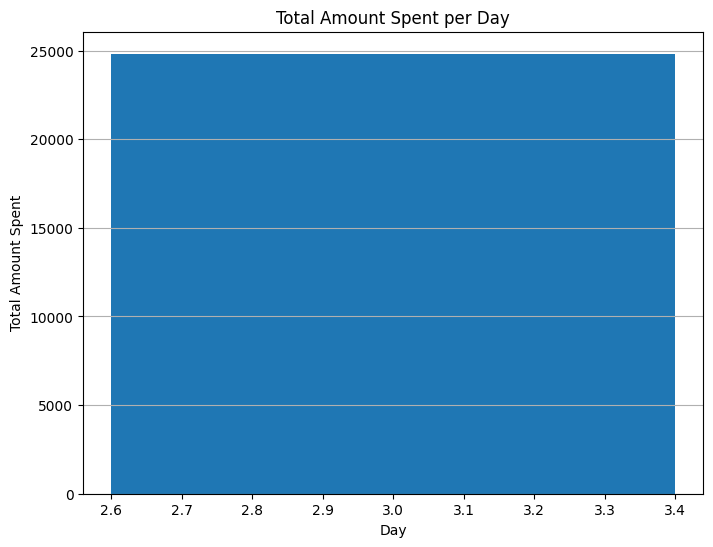

In [49]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder.appName("PySparkPlot").getOrCreate()

# Load data from a JSON file into a PySpark DataFrame
json_file_path = spark.read.option("multiline","true") \
      .json("/tmp/E_comm.json") # Replace with your JSON file path
df=json_file_path

# Convert the DataFrame to a Pandas DataFrame for plotting
pdf = df.select("day", "amount_spent").toPandas()

# Group data by day and calculate the total amount spent per day
grouped_pdf = pdf.groupby("day")["amount_spent"].sum().reset_index()

# Plot the data using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(grouped_pdf["day"], grouped_pdf["amount_spent"])
plt.title("Total Amount Spent per Day")
plt.xlabel("Day")
plt.ylabel("Total Amount Spent")
plt.grid(axis='y')
plt.show()

# Stop the Spark session
spark.stop()